# Aprendizaje no supervisado - reducción de dimensión

- Se presentan los conceptos y simulaciones básicas relacionadas con técnicas clásicas lineales y no lineales de reducción de dimensión.

## Análisis de componentes de principales - Principal Component Analysis (PCA)

![gifpca](https://miro.medium.com/v2/resize:fit:1400/format:webp/0*TXIbCytfgo5p5hty.gif)


- PCA busca un espacio de menor dimensión que preserve la mayor cantidad de variabilidad posible desde el espacio original (alta dimensión).

- Desde una perspectiva generativa, PCA asume que los datos $\mathbf{X} \in \mathbb{R}^{N \times P}$ son generados desde un espacio de baja dimensión (espacio latente) $\mathbf{Z} \in \mathbb{R}^{N \times M}$, donde $M < P$:

\begin{equation}
\mathbf{X} = \mathbf{Z} \mathbf{W}^T,
\end{equation}

- $\mathbf{Z}=\mathbf{X}\mathbf{W}$: matriz de baja dimensión.
- $\mathbf{W} \in \mathbb{R}^{P \times M}$: componentes principales (loading vectors).

El problema de optimización desde el punto de vista generativo:

\begin{align}
\mathbf{W}^*=&\arg\min_\mathbf{W} \|\mathbf{X}-\mathbf{Z} \mathbf{W}^T\|_F \\
   \text{s.t.} & \quad \mathbf{W}\mathbf{W}^\top  = \mathbf{I}
\end{align}



- PCA también puede resolverse maximizando la varianza de los datos proyectados.

- Asumiendo datos centralizados $\mathbf{X}$, la covarianza $\mathbf{\Sigma}\in \mathbb{R}^{P \times P}$ se define como:

\begin{equation}
\mathbf{\Sigma} = \frac{1}{N} \mathbf{X}^T \mathbf{X}.
\end{equation}

- El problema de optimización de PCA se puede reescribir como:

\begin{align}
\mathbf{W}^*=&\arg\max_\mathbf{W} \text{tr}(\mathbf{W}^T \mathbf{\Sigma} \mathbf{W}),\\
 \text{s.t.} & \quad \mathbf{W}\mathbf{W}^\top  = \mathbf{I}
\end{align}


- La solución del problema se centra en los $M$ vectores propios de la matriz de covarianza, correspodiente a los $M$ valores propios más altos.

- Ver la demostración [PCA generativo a PCA por varianza](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/otros/DemostracionPCA.pdf).


**Ejemplo:** Construyamos un conjunto de datos 3D del famoso dato sintético rollo Suizo - Swiss Roll.

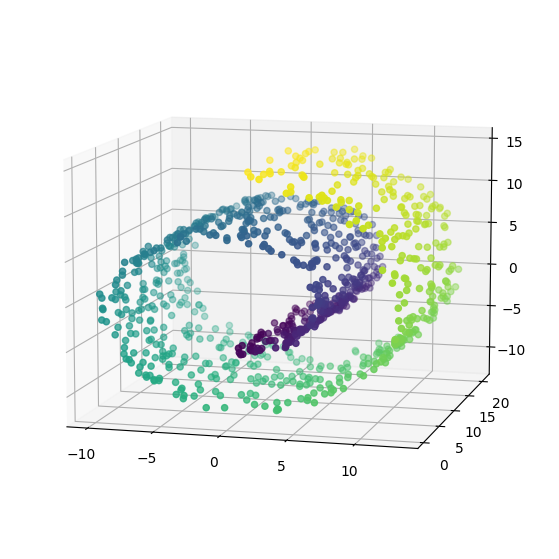

In [1]:
from sklearn.datasets import make_swiss_roll
import numpy as np
import matplotlib.pyplot as plt

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
#t contiene el orden estructural de los datos
#crear scatter en 3D
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X[:,0], X[:,1], X[:,2],c=t)
ax.view_init(elev=10, azim=-75)
plt.show()

**NOTA:** PCA supone que el conjunto de datos se centra en el origen. Como veremos, las clases de PCA de Scikit-Learn se encargan de centrar los datos por usted. Sin embargo, si implementa PCA usted mismo, o si usa otras bibliotecas, **no olvide centrar los datos primero**, incluso considere aplicar normalización zscore.

### Usando PCA de scikit-learn

-La clase PCA de Scikit-Learn implementa PCA usando la descomposición espectral (EIG y SVD).

-El siguiente código aplica PCA para reducir la dimensionalidad del conjunto de datos a dos dimensiones (tenga en cuenta que automáticamente se encarga de centrar los datos):

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
Y2D = pca.fit_transform(X)

- El hiperparámetro `n_components` puede ser un número entero (número de dimensiones o componentes $M\leq P$) o un valor en el intervalo [0,1] para cuantificar el número de componentes requerido para preservar una varianza retenida dada.

Tenga en cuenta que ejecutar PCA varias veces en conjuntos de datos ligeramente diferentes puede generar espacios latentes distintos. En general, la única diferencia es que algunos ejes pueden voltearse.

**Nota**: el problema de optimización de PCA que incluye costo y restricciones cuadráticas, da como resultado un problema no convexo.

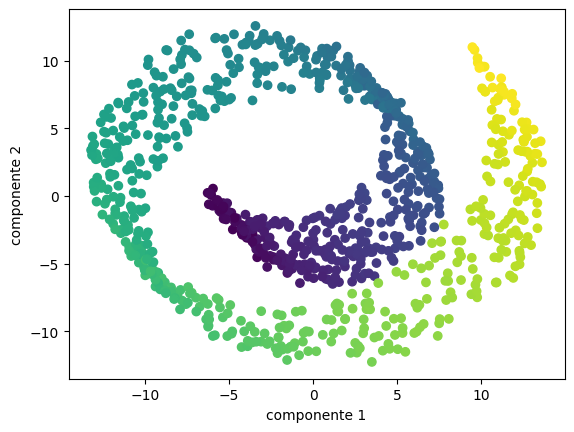

In [3]:
plt.scatter(Y2D[:,0],Y2D[:,1],c=t)
plt.xlabel('componente 1')
plt.ylabel('componente 2')
plt.show()

Ahora vamos a recuperar los puntos 3D proyectados en el plano (subespacio PCA 2D).

In [4]:
X3D_inv = pca.inverse_transform(Y2D)

Por supuesto, **hubo cierta pérdida de información durante el paso de proyección**, por lo que los puntos 3D recuperados *no son exactamente iguales a los puntos 3D originales*:

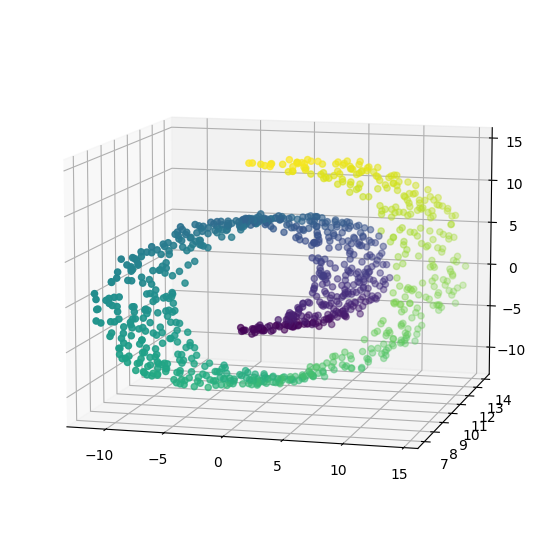

In [5]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
ax.scatter3D(X3D_inv[:,0], X3D_inv[:,1], X3D_inv[:,2],c=t)
ax.view_init(elev=10, azim=-75)
plt.show()

Podemos calcular el error de reconstrucción:

In [6]:
np.mean(np.sum(np.square(X3D_inv - X), axis=1))

37.33439046246001

Las reconstrucciones de ambos métodos **no son idénticas** porque la clase PCA de Scikit-Learn se encarga automáticamente de revertir el centrado medio, *pero si restamos la media, obtenemos la misma reconstrucción*.

El objeto PCA da acceso a los componentes principales que calculó:

In [7]:
pca.components_

array([[ 0.56791312,  0.15670748,  0.80803308],
       [-0.77712377, -0.2213858 ,  0.5891239 ]])

# Ejercicio 1

- Presente el problema de optimización de PCA como un algoritmo generativo (reconstrucción o filtrado de datos), y compare el problema de optimización desde el punto de vista generativo vs. preservación de la varianza. (Ver [material de apoyo PCA](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/4_Clasificacion_Clustering_DR/otros/DemostracionPCA.pdf)).



### Varianza retenida (explicada)

- El valor propio relacionado con cada compoenente, codifica la varianza retenida del espacio de entrada.

Por ejemplo, veamos las razones de varianza explicadas de los dos primeros componentes del conjunto de datos 3D representados

In [8]:
pca.explained_variance_ratio_

array([0.40782396, 0.3020019 ])


Esto le indica que **el 40.8% de la varianza del conjunto de datos se encuentra a lo largo del primer eje**, y el **30.2% se encuentra a lo largo del segundo eje**.

### Determinar el número de dimensiones proyectas

El siguiente código calcula PCA sin reducir la dimensionalidad, luego calcula el número mínimo de dimensiones requeridas para preservar el 95% de la variación del conjunto de entrenamiento (se utilizará la base de datos Mnist que tiene 784 dimensiones de entrada).

In [9]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

mnist = keras.datasets.mnist #cargar fashion mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train.reshape(X_train.shape[0], -1)/255.
y = y_train

print(X.shape,y.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 784) (60000,)


In [10]:
#se submuestrea para facilidad en cálculos
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.98,random_state=123)
print(X_train.shape,y_train.shape)

(1200, 784) (1200,)


In [11]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d      = np.argmax(cumsum >= 0.95) + 1 #varianza acumulada ordenando componentes
d

135

También podemos establecer *n_components = d* y ejecutar PCA nuevamente. Sin embargo, hay una opción mucho mejor: en lugar de especificar el número de componentes principales que desea conservar, puede establecer *n_components* para que sea flotante entre 0.0 y 1.0, lo que indica la relación de varianza que desea conservar:

In [12]:
pca       = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

135

In [13]:
np.sum(pca.explained_variance_ratio_)

0.9503404973326779

- Otra opción más es **trazar la varianza explicada en función del número de dimensiones** (simplemente trazar *cumsum*; ver Figura a continuación).

- Por lo general, habrá un codo en la curva, donde la variación explicada deja de crecer rápidamente. Puede pensar en esto como la dimensionalidad intrínseca del conjunto de datos.

- En este caso, puede ver que reducir la dimensionalidad a unas 100 dimensiones no perdería demasiada varianza explicada.

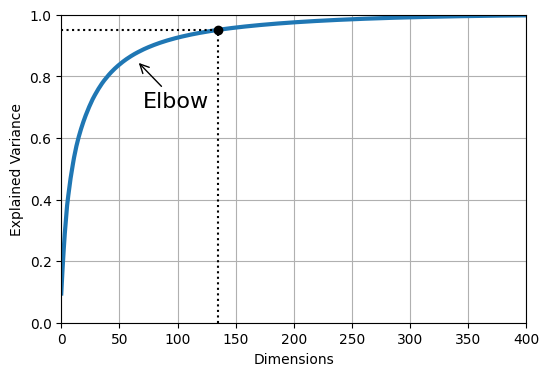

In [14]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
#save_fig("explained_variance_plot")
plt.show()

### PCA para compresión de datos

 **Ejemplo:** intentemos aplicar PCA al conjunto de datos MNIST mientras conserva el $95\%$ de su varianza.

Debería encontrar que cada instancia tendrá un poco más de $150$ características, en lugar de las características $784$ originales.

In [15]:
pca       = PCA(n_components=0.95)
X_train = np.array(X_train)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

135

- Entonces, aunque se conserva la mayor parte de la variación, ¡el conjunto de datos ahora es inferior al $20\%$ de su tamaño original!.

- Esta es una relación de compresión razonable, y podemos ver cómo esto puede acelerar enormemente un algoritmo de clasificación (como un clasificador SVM).

**Ejemplo:** En el siguiente código se comprime el conjunto de datos MNIST a $154$ dimensiones, luego usa el método *inverse_transform()* para descomprimirlo nuevamente a $784$ dimensiones. La  siguiente Figura muestra algunos dígitos del conjunto de entrenamiento original (a la izquierda) y los dígitos correspondientes después de la compresión y descompresión. Puede ver que hay una ligera pérdida de calidad de imagen, pero los dígitos aún están casi intactos.

(30, 784)
(30, 784)


Text(0.5, 1.0, 'Compressed')

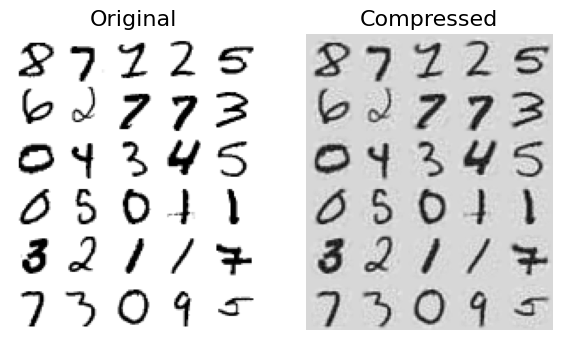

In [16]:
import matplotlib as mpl

pca         = PCA(n_components = 154)
X_reduced   = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

def plot_digits(instances, images_per_row=5, **options):
    size           = 28
    images_per_row = min(len(instances), images_per_row)
    print(instances.shape)
    images         = [instance.reshape(size,size) for instance in instances]
    n_rows         = (len(instances) - 1) // images_per_row + 1
    row_images     = []
    n_empty        = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::40])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::40])
plt.title("Compressed", fontsize=16)
#save_fig("mnist_compression_plot")

In [17]:
rnd_pca   = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

### Kernel PCA

- El algoritmo Kernel PCA permite calcular los componentes principales a partir de un mapeo no lineal basado en funciones núcleo.

- En KPCA los datos en $\mathbf{X}$ son mapeados a un espacio de alta dimensión desde la función $\phi: \mathbb{R}^P \to \mathscr{F}$.

- Luego, se encuentran los componentes principales sobre la matriz kernel $\mathbf{K}\in \mathbb{R}^{N \times N}$, con $K_{nn'} = \kappa(\mathbf{x}_n,\mathbf{x}_{n'})=\langle \phi(\mathbf{x}_n),\phi(\mathbf{x}_{n'})\rangle$.


\begin{equation}
\mathbf{K} \boldsymbol{\alpha} = \lambda \boldsymbol{\alpha},
\end{equation}


- Para encontrar la proyección de los datos:

\begin{equation}
\mathbf{z}_n = \sum_{n'=1}^N \alpha_{n'} \kappa(\mathbf{x}_n, \mathbf{x}_{n'}), \quad n = 1, 2, \ldots, N,
\end{equation}






# Ejercicio 2

- Presente un paralelo entre el problema de optimización de PCA y el de Kernel PCA.


**Ejemplo:** el siguiente código utiliza la clase *KernelPCA* de Scikit-Learn para realizar kPCA con un kernel RBF.

- Se utilizará el swiss-roll para facilitar la visualización.

In [18]:
from sklearn.decomposition import KernelPCA

#se ilustra nuevamente sobre swiss roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)


rbf_pca   = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

- Ahora se comparan tres kernels distintos para encontrar la proyección de los datos:

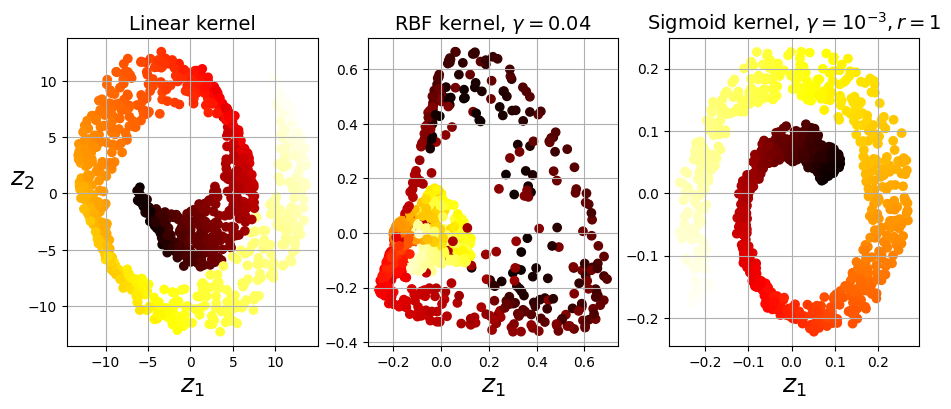

In [19]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9
plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced

    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)
#save_fig("kernel_pca_plot")
plt.show()

La Figura muestra el rollo suizo, reducido a dos dimensiones usando un núcleo lineal (equivalente a simplemente usar la clase *PCA*), un núcleo RBF y un núcleo sigmoide (Logístico).

### kPCA: Definiendo el kernel y sus hiperparámetros

- Como kPCA es un algoritmo de aprendizaje no supervisado, *no existe una medida de rendimiento obvia para ayudarlo a seleccionar los mejores valores de kernel e hiperparámetros*.

- Sin embargo, la reducción de dimensionalidad es a menudo un paso de preparación para una tarea de aprendizaje supervisada (por ejemplo, clasificación), por lo que simplemente puede usar la **búsqueda de cuadrícula** para seleccionar el núcleo y los hiperparámetros conducen al mejor rendimiento en esa tarea.

**Ejemplo:** el siguiente código crea una guía de dos pasos para la clasificación de la base de datos Mnist.

- Primero reduciendo la dimensionalidad a dos dimensiones usando kPCA, luego aplicando Regresión logística para la clasificación.

- Se utiliza *GridSearchCV* para encontrar el mejor valor de kernel y gamma para kPCA para obtener la mejor precisión de clasificación al final de la guía:

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

Los mejores kernels e hiperparámetros están disponibles a través de la variable *best_params_*:

In [21]:
print(grid_search.best_params_)

{'kpca__gamma': 0.03, 'kpca__kernel': 'rbf'}


**Tal vez se pregunte cómo realizar la reconstrucción de una instancia proyectada con kPCA?**.

- Una solución es entrenar un modelo de regresión supervisado, con las instancias proyectadas como el conjunto de entrenamiento y las instancias originales como los objetivos.

- Scikit-Learn lo hará automáticamente si configura *fit_inverse_transform = True*, ([pre-image problem](https://www.aaai.org/Papers/ICML/2003/ICML03-055.pdf)) como se muestra en el siguiente código:

In [22]:
from sklearn.metrics import mean_squared_error

rbf_pca    = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced  = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)
mean_squared_error(X, X_preimage)

32.786308795766104

Podemos usar GridSearchCV para encontrar el núcleo y los hiperparámetros que minimizan este error de reconstrucción pre-imagen.

# t-distributed stochastic neighborhood embedding

- [t-SNE](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf?fbclid=IwA) es de los algoritmos más potentes en reducción de dimensión dado que permite unir los principios de manifold learning y probabilidades, para lidear con el problema de concentración de las normas (métricas en espacios de alta dimensión se distribuyen muy diferente a métricas en espacios de baja dimensión).


![gifpca](https://learnopencv.com/wp-content/uploads/2022/11/tsne.gif)



- t-SNE busca minimizar la diferencia entre las funciones de probabilidad del espacio original (alta dimensión) y el espacio reducido (baja dimensión), evitando el problema de la concentración de la norma.


- La similitud es modelada como una distribución Gaussiana, tal que la probabilidad condicional $p_{n'|n}$ que define si  $\mathbf{x}_n$ selecciona a $\mathbf{x}_{n'}$ como su vecino es:

\begin{equation}
p_{n'|n} = \frac{\exp(-\|\mathbf{x}_n - \mathbf{x}_{n'}\|^2 / 2\sigma_n^2)}{\sum_{k \neq n} \exp(-\|\mathbf{x}_n - \mathbf{x}_k\|^2 / 2\sigma_n^2)},
\end{equation}

donde $\sigma_n\in \mathbb{R}^+$.

La probabilidad conjunta se puede definir como :

\begin{equation}
p_{nn'} = \frac{p_{n'|n} + p_{n|n'}}{2N}.
\end{equation}

\subsection*{2. Similarity in Low-Dimensional Space}

- Para el espacio de baja dimensión se utiliza un distribución t-Student con un grado de libertad (distribución de Cauchy).

- La probabilidad conjunta $q_{nn'}$ que modela si $\mathbf{y}_n$ y $\mathbf{z}_{n'}$ están cercanos es dada por:

\begin{equation}
q_{nn'} = \frac{(1 + \|\mathbf{z}_n - \mathbf{z}_{n'}\|^2)^{-1}}{\sum_{k \neq l} (1 + \|\mathbf{z}_k - \mathbf{z}_l\|^2)^{-1}}.
\end{equation}


- t-SNE minimiza la divergencia de  Kullback-Leibler (KL) entre $P = \{p_{nn'}\}$ y $Q = \{q_{nn'}\}$:

\begin{equation}
\text{KL}(P \| Q) = \sum_{n \neq n'} p_{nn'} \log \left( \frac{p_{nn'}}{q_{nn'}} \right).
\end{equation}

- La minización se resuelve convencionalmente por métodos de gradiente.

- Es importante resaltar que el ancho de bando en el espacio de alta dimensión se fija por muestra, fijando un valor de entropia común (perplexity).




In [23]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity= 20, random_state=42,init='pca')
X_reduced_tsne = tsne.fit_transform(X)

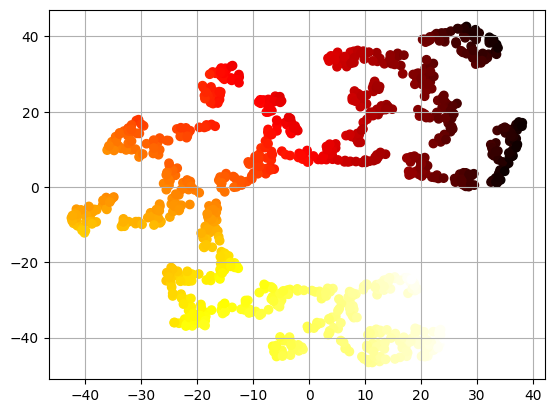

In [24]:
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:, 1], c=t, cmap=plt.cm.hot)
plt.grid(True)
plt.show()


## Uniform Manifold Approximation and Projection (UMAP)

![gifumap](https://umap-learn.readthedocs.io/en/latest/_images/aligned_umap_pendigits_anim.gif)

- UMAP es una técnica de reducción de dimensión que modela el espacio de alta dimensión como estructura topológica difusa y la optimiza en el espacio de baja dimensión preservando distancias globales y locales.

- UMAP construye un grafo ponderado para representar la estructura topológica difusa.

- La probabilidad $p_{nn'}$ que representa el peso del borde entre $\mathbf{x}_n$ and $\mathbf{x}_{n'}$ esta dada por:

\begin{equation}
p_{nn'} = \exp\left(-\frac{\|\mathbf{x}_n - \mathbf{x}_{n'}\| - \rho_n}{\sigma_n}\right),
\end{equation}

- $\rho_n$ es la distancia al vecino más cercano de $\mathbf{x}_n$, lo que asegura que las distancias locales no se ven afectadas por ruido.
    
- $\sigma_n$ se determina por una un número fijo de vecinos.


- La relación difusa se vuelve simétrica como:

\begin{equation}
\tilde{p}_{nn'} = p_{nn'} + p_{n'n} - p_{nn'} p_{n'n}.
\end{equation}



- Las relaciones en el espacio de baja dimensión se fijan mediante una distribución t-student de cola pesada:

\begin{equation}
q_{nn'} = \left(1 + a \|\mathbf{z}_n - \mathbf{z}_{n'}\|^{2b}\right)^{-1},
\end{equation}

con $a$ y $b$ como parámetros de la distribución. Generalmente se fijan en 1.


- UMAP minimiza la entropía cruzada :

\begin{equation}
C(P;Q) = \sum_{n \neq n'} \left( -\tilde{p}_{nn'} \log(q_{nn'}) - (1 - \tilde{p}_{nn'}) \log(1 - q_{nn'}) \right).
\end{equation}

- Convencionalmente se utilizan métodos de gradiente para resolver la optimización.

In [25]:
!pip install umap-learn #librería umap
!pip install datashader bokeh holoviews #gráficos umap

In [26]:
import umap
import umap.plot

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn

In [27]:
red = umap.UMAP(n_components=2,n_neighbors=40, min_dist=0.2)
X_reduced_umap = red.fit_transform(X)

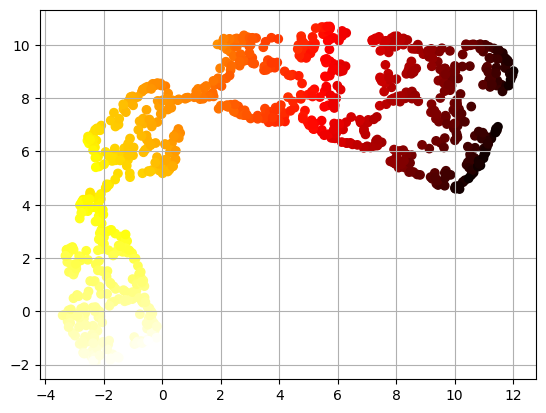

In [28]:
plt.scatter(X_reduced_umap[:, 0], X_reduced_umap[:, 1], c=t, cmap=plt.cm.hot)
plt.grid(True)
plt.show()


- UMAP presenta una serie de métodos para [gráficos interactivos](https://umap-learn.readthedocs.io/en/latest/plotting.html)

<Axes: >

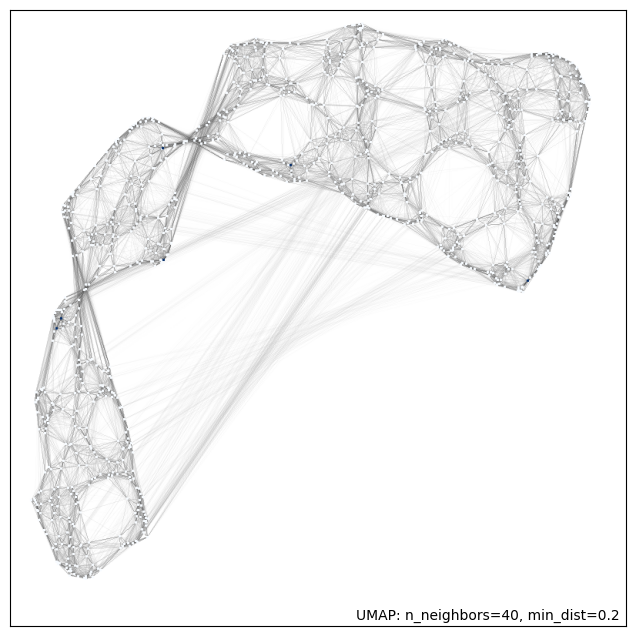

In [29]:
umap.plot.connectivity(red, show_points=True)

/usr/local/lib/python3.10/dist-packages/umap/plot.py:894: UserWarning: Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!
  warn(


<Axes: >

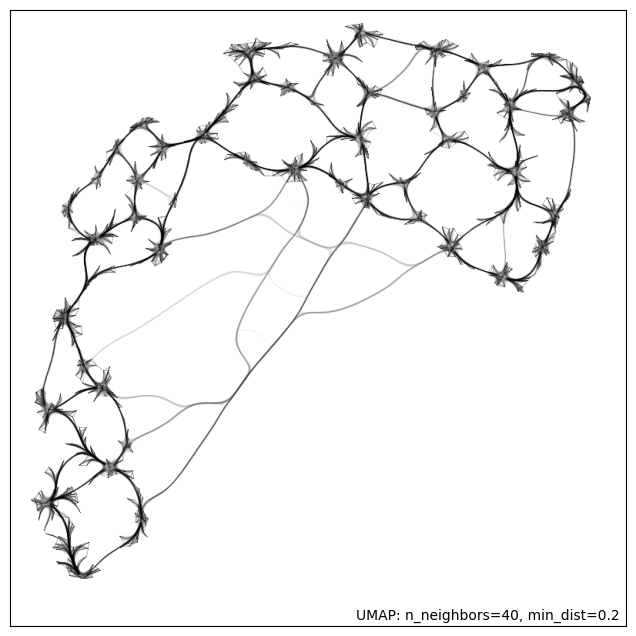

In [30]:
umap.plot.connectivity(red, edge_bundling='hammer')

# Ejercicio 3

1.  Consulte en que consiste el algoritmo [eigenfaces](https://direct.mit.edu/jocn/article/3/1/71/3025/Eigenfaces-for-Recognition). Compare el modelo de eigenfaces para reducción de dimensión con el algoritmo PCA. Aplique eigenfaces a Mnist sobre el conjunto `X_train` y grafique las dos primeras dimensiones con las imagenes originales sobre cada punto proyectado, y presente las cinco primeras "eigenfaces" en dibujo tipo imagen.

2. Utilizando la base de datos muestreada Mnist en `X_train` y `y_train`, realice una análisis comparativo en términos del coeficiente de silueta del agrupamiento de los datos a 2 dimensiones utilizando kmeans. Considere los métodos: PCA, kernel PCA rbf, t-SNE y UMAP.


In [31]:
#Ayuda de código
red = PCA(n_components=0.9)
Z = red.fit_transform(X_train)


In [32]:
#graficar 2D con imágenes originales
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
#img_w y img_h representan la resolución original de los datos
def plot_mnist_2d(Z,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(10,6))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

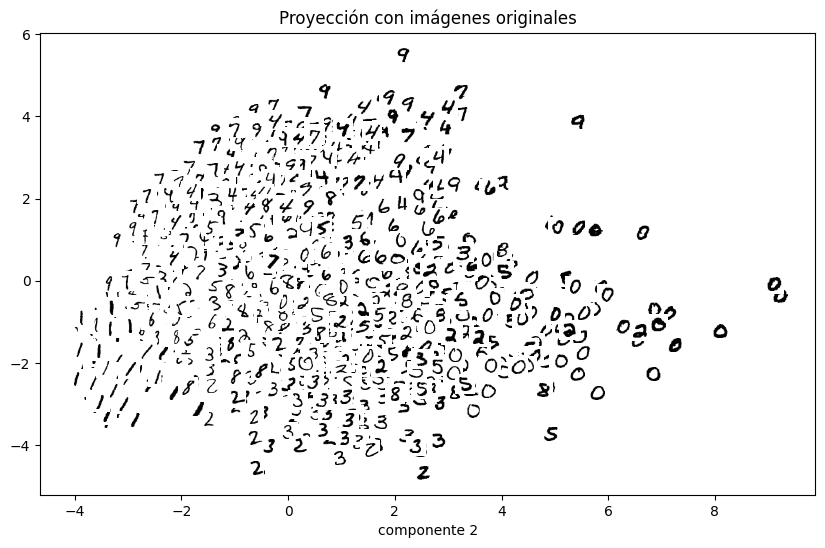

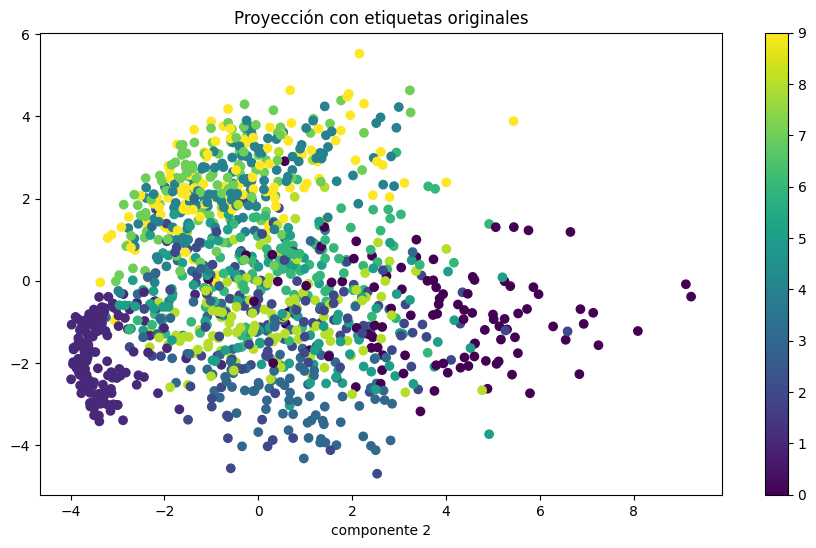

In [33]:
plot_mnist_2d(Z,X_train,img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Proyección con imágenes originales')
plt.show()

plt.figure(figsize=(11,6))
plt.scatter(Z[:,0],Z[:,1],c=y_train)
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Proyección con etiquetas originales')
plt.colorbar()
plt.show()

In [34]:
#graficar componentes como "eigenfaces"
print(red.components_.shape)


(80, 784)


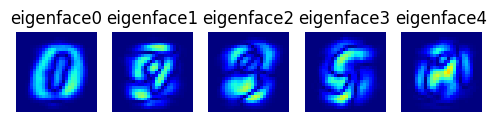

In [35]:
n_rows = 1
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
#resolución imagenes
img_w = 28
img_h = 28

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(abs(red.components_[index].reshape(img_w,img_h)),
                    vmin=abs(red.components_).min(), vmax=abs(red.components_).max(),cmap="jet", interpolation="nearest")
        plt.axis('off')
        plt.title("eigenface" + str(index), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()